In [466]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [467]:
heart_df = pd.read_csv("data/improved_dataset.csv")
results = []

In [468]:
x = heart_df.drop(columns=['heart_disease'])
y = heart_df['heart_disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## I. Logistic Regression

In [469]:
preprocessor = StandardScaler()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [470]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [471]:
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

results.append({'Model': "Logistic Regression", 'Accuracy': accuracy, 'AUC': roc_auc})

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  54.56026058631922
ROC AUC:  49.193548387096776
Confusion Matrix:  [[269  97]
 [182  66]]
Classification Report:                precision    recall  f1-score   support

           0       0.60      0.73      0.66       366
           1       0.40      0.27      0.32       248

    accuracy                           0.55       614
   macro avg       0.50      0.50      0.49       614
weighted avg       0.52      0.55      0.52       614



## II. Random Forest

In [472]:
preprocessor = StandardScaler()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [473]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [474]:
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

results.append({'Model': "Random Forest", 'Accuracy': accuracy, 'AUC': roc_auc})

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  52.76872964169381
ROC AUC:  48.97265556143135
Confusion Matrix:  [[251 115]
 [175  73]]
Classification Report:                precision    recall  f1-score   support

           0       0.59      0.69      0.63       366
           1       0.39      0.29      0.33       248

    accuracy                           0.53       614
   macro avg       0.49      0.49      0.48       614
weighted avg       0.51      0.53      0.51       614



## III. Gradient Boosting

In [475]:
preprocessor = StandardScaler()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
])

model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0


In [476]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [477]:
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

results.append({'Model': "Gradient Boosting", 'Accuracy': accuracy, 'AUC': roc_auc})

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  52.28013029315961
ROC AUC:  49.73228450555261
Confusion Matrix:  [[240 126]
 [167  81]]
Classification Report:                precision    recall  f1-score   support

           0       0.59      0.66      0.62       366
           1       0.39      0.33      0.36       248

    accuracy                           0.52       614
   macro avg       0.49      0.49      0.49       614
weighted avg       0.51      0.52      0.51       614



## IV. SVM

In [478]:
preprocessor = StandardScaler()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", C=1, gamma="scale", class_weight="balanced", probability=True, random_state=42))
])

model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [479]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [480]:
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

results.append({'Model': "SVM", 'Accuracy': accuracy, 'AUC': roc_auc})

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  52.931596091205215
ROC AUC:  48.50277630883131
Confusion Matrix:  [[278  88]
 [201  47]]
Classification Report:                precision    recall  f1-score   support

           0       0.58      0.76      0.66       366
           1       0.35      0.19      0.25       248

    accuracy                           0.53       614
   macro avg       0.46      0.47      0.45       614
weighted avg       0.49      0.53      0.49       614



## V. XGBoost

In [481]:
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos

model = XGBClassifier(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
)

model.fit(x_train, y_train)

importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances = importances.sort_values(ascending=False)

print(importances)

restecg_1           0.047923
cp_4                0.046110
cp_3                0.041437
cp_2                0.035922
bp_high             0.035720
restecg_2           0.035590
age_group           0.035327
slope_2             0.032320
slope_3             0.032275
fbs                 0.028044
thal_7              0.027756
diabetes            0.027722
risk_factors        0.027553
chol_high           0.027056
smoking             0.026212
chol_low            0.025730
oldpeak             0.024962
bmi_category        0.024853
exang               0.024767
max_hr_predicted    0.024462
thalach             0.024411
chol_age_ratio      0.024146
bmi_x_chol          0.024064
age                 0.024031
bmi                 0.023807
hr_percent          0.023571
chol                0.023428
age_x_chol          0.023332
trestbps            0.023293
thalach_x_age       0.023169
thal_6              0.022931
st_risk             0.022658
ca                  0.022520
sex                 0.021565
weighted_risk 

In [482]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [483]:
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

results.append({'Model': "XGBoost", 'Accuracy': accuracy, 'AUC': roc_auc})

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  54.39739413680782
ROC AUC:  52.23647100299665
Confusion Matrix:  [[243 123]
 [157  91]]
Classification Report:                precision    recall  f1-score   support

           0       0.61      0.66      0.63       366
           1       0.43      0.37      0.39       248

    accuracy                           0.54       614
   macro avg       0.52      0.52      0.51       614
weighted avg       0.53      0.54      0.54       614



## Model Comparison

In [484]:
results_df = pd.DataFrame(results)

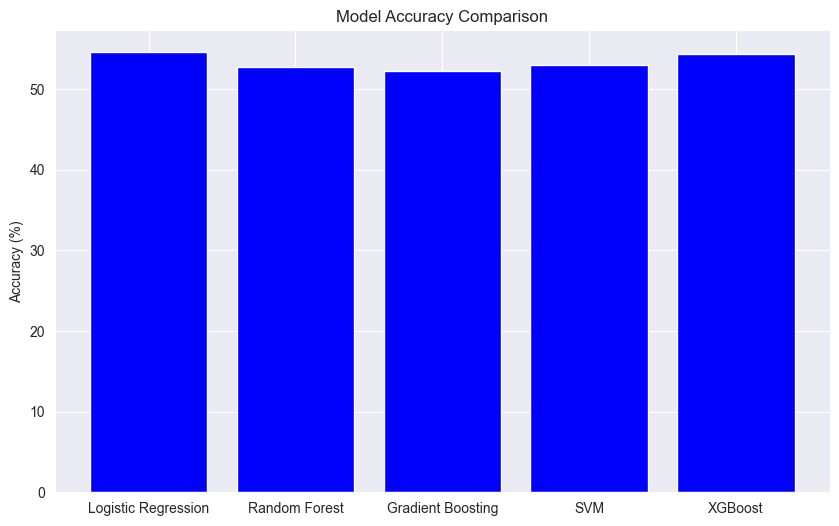

In [485]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color='b')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()

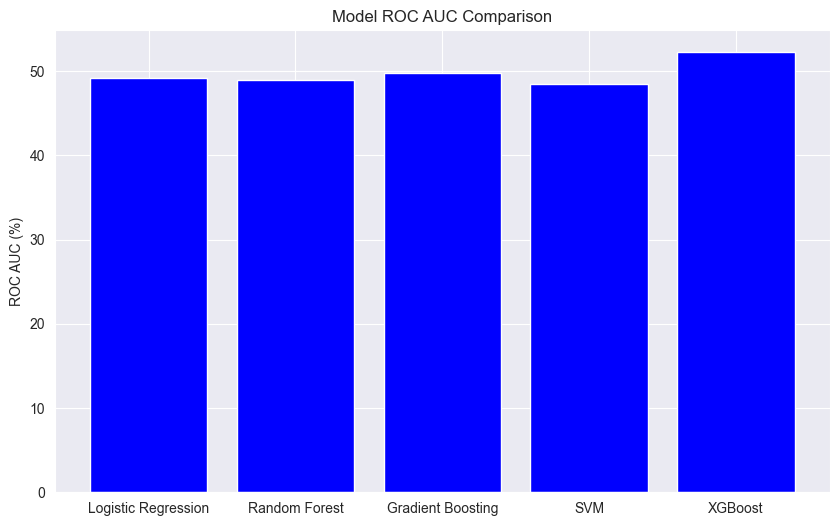

In [486]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['AUC'], color='b')

plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC (%)")
plt.show()